## Analyse : 
    - On recherche le meilleur dé pour chaque rank
    - On cherche la moyenne / médianne des dés par rank
    - On cherche le meilleur dé global
    - Le dé avec la variance la plus variée
    - le dé le plus "stable"
 
    
- PAR HEURE

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dice_data = pd.DataFrame(pd.read_csv("dataframe/donnees_16h06.csv"))
dice_data.groupby('Nom_dé')['Résultat'].mean()

Nom_dé
base_dice         5.0054
normal_dice      10.3445
parabole_dice     4.9810
power_dice        6.8204
rank_dice         5.9860
scale_dice       10.2880
unscale_dice      9.4800
Name: Résultat, dtype: float64

In [4]:
moyenne_par_de_et_rank = dice_data.groupby(['Nom_dé', 'Rank'])['Résultat'].mean().unstack()
moyenne_par_de_et_rank

Rank,Bronze,Challenger,Diamond,Emerald,Gold,Grand Master,Iron,Master,Platinum,Silver
Nom_dé,,,,,,,,,,
base_dice,3.982,5.980,4.979,6.104,3.897,7.268,3.563,5.472,4.407,4.402
normal_dice,10.421,10.361,10.430,10.173,10.679,10.508,10.237,10.060,10.357,10.219
parabole_dice,7.301,10.987,1.937,0.971,1.636,7.325,11.022,3.862,0.988,3.781
power_dice,3.980,11.210,8.970,8.331,6.024,9.000,2.009,6.352,7.466,4.862
rank_dice,2.480,10.369,7.685,6.378,4.449,9.499,1.475,8.543,5.490,3.492
scale_dice,14.380,7.020,8.160,9.000,11.440,6.700,16.860,7.760,9.640,11.920
unscale_dice,5.320,13.140,11.660,11.120,8.720,12.540,3.460,12.160,9.420,7.260


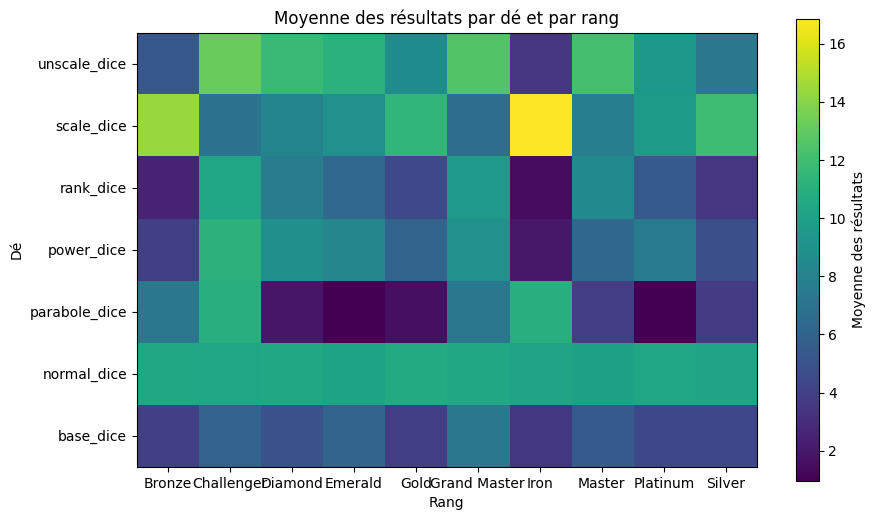

In [5]:
plt.figure(figsize=(10, 6))
plt.imshow(moyenne_par_de_et_rank, cmap='viridis', interpolation='nearest')

plt.colorbar(label='Moyenne des résultats')
plt.xlabel('Rang')
plt.ylabel('Dé')
plt.title('Moyenne des résultats par dé et par rang')


plt.xticks(range(len(moyenne_par_de_et_rank.columns)), moyenne_par_de_et_rank.columns)
plt.yticks(range(len(moyenne_par_de_et_rank.index)), moyenne_par_de_et_rank.index)
plt.gca().invert_yaxis() 
plt.show()

In [6]:
df = dice_data

nouveau_df = pd.DataFrame(columns=df['Nom_dé'].unique())

for nom_de in nouveau_df.columns:
    resultat_de = df.loc[df['Nom_dé'] == nom_de, 'Résultat']
    nouveau_df[nom_de] = resultat_de.values

print(nouveau_df)

      base_dice  normal_dice  parabole_dice  power_dice  rank_dice  \
0             3            8             11           1          1   
1             3           18              0           2          1   
2             5           12              0           2          1   
3             4           20             13           3          1   
4             1            6              0           3          1   
...         ...          ...            ...         ...        ...   
9995         10           11             20          18         11   
9996          1            1             13          18         11   
9997          4           12             10          18          5   
9998          3           15             14          18         12   
9999          1           10              0           4          9   

      scale_dice  unscale_dice  
0             20             0  
1             20             0  
2             20             0  
3             20           

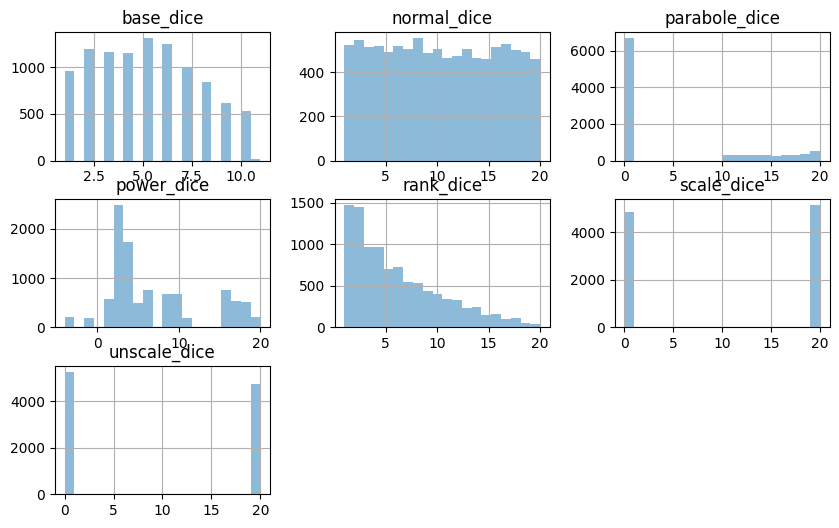

In [7]:
nouveau_df.hist(figsize=(10, 6), bins=20, alpha=0.5)
plt.title('Histogramme des résultats de chaque dé')
plt.xlabel('Résultat')
plt.ylabel('Fréquence')
plt.legend(nouveau_df.columns)
plt.grid(False)
plt.show()

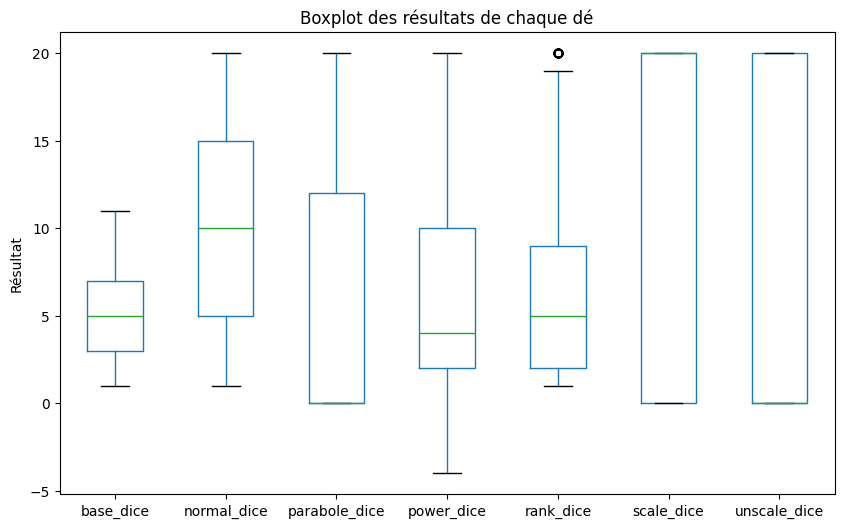

In [8]:
nouveau_df.boxplot(figsize=(10, 6))
plt.title('Boxplot des résultats de chaque dé')
plt.ylabel('Résultat')
plt.grid(False)
plt.show()

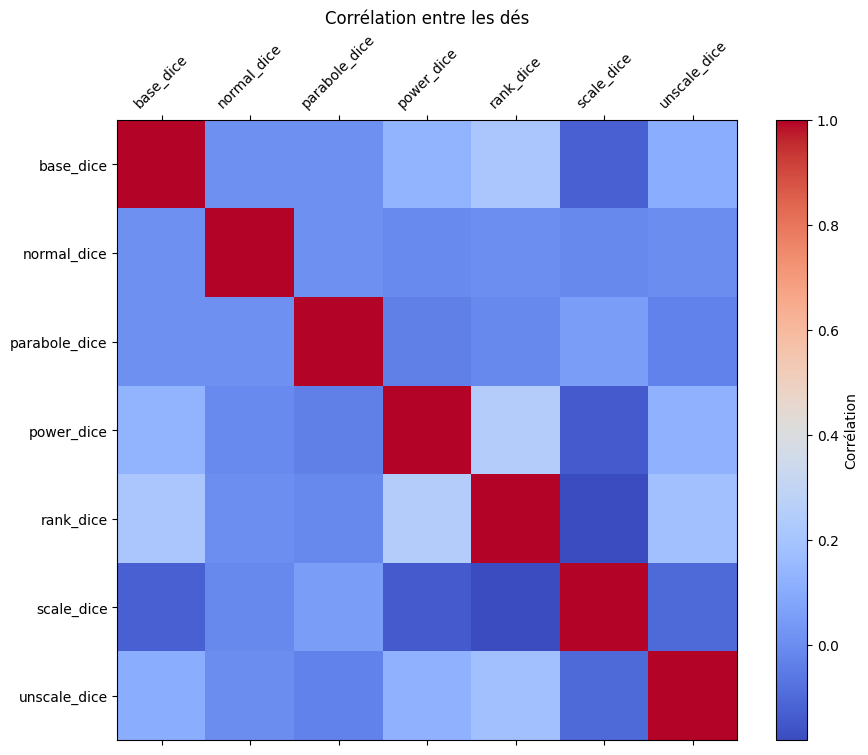

In [9]:
correlation = nouveau_df.corr()
plt.figure(figsize=(10, 8))
plt.matshow(correlation, cmap='coolwarm', fignum=1)
plt.colorbar(label='Corrélation')
plt.xticks(range(len(correlation.columns)), correlation.columns, rotation=45)
plt.yticks(range(len(correlation.columns)), correlation.columns)
plt.title('Corrélation entre les dés')
plt.show()

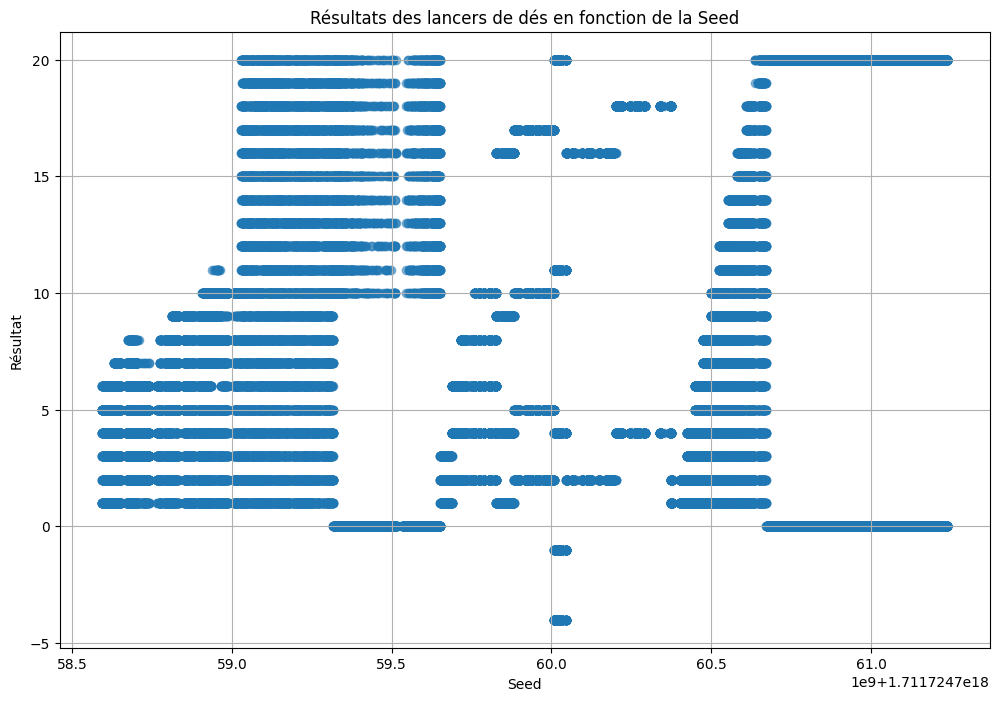

In [10]:
plt.figure(figsize=(12, 8))
plt.scatter(df['Seed'], df['Résultat'], alpha=0.5)
plt.title('Résultats des lancers de dés en fonction de la Seed')
plt.xlabel('Seed')
plt.ylabel('Résultat')
plt.grid(True)
plt.show()